In [15]:
# Parameters
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def annihilation(d):
    return np.diag(np.sqrt(np.arange(1, d)), 1)

def creation(d):
    return annihilation(d).T

def calculate_zz(eigenvalues):
    e00 = eigenvalues[0]
    e01 = eigenvalues[1]
    e10 = eigenvalues[d2]
    e11 = eigenvalues[d2+1]
    return (e00 - e01 - e10 + e11)/2/np.pi
def sort_eigenpairs(eigenvalues, eigenvectors):
    n = eigenvectors.shape[0]
    sorted_indices = []s

    for i in range(n):
        max_abs_vals = np.abs(eigenvectors[i, :])
        max_index = np.argmax(max_abs_vals)
        while max_index in sorted_indices:
            max_abs_vals[max_index] = -np.inf
            max_index = np.argmax(max_abs_vals)
        sorted_indices.append(max_index)

    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvalues, sorted_eigenvectors
def state_index(index,dim):
    m,n,k = index
    M,N,K = dim
    return m*(N*K)+n*K+k
def floquetapp(A,omegad,omega3):
    dim = [5,5,5]
    d1 = d2 = d3 = 5
    omega1 = 5 * 2 * np.pi
    omega2 = 5.09* 2 * np.pi
    delta1 = delta2 = -0.24 * 2 * np.pi
    delta3 = -0.14 * 2 * np.pi
    g13 = g23 = 0.11 * 2 * np.pi
    g12 = -6e-3 * 2 * np.pi

    # Create operators
    a1, a2, a3 = [annihilation(d) for d in (d1, d2, d3)]
    a1d, a2d, a3d = [creation(d) for d in (d1, d2, d3)]
    I1, I2, I3 = [np.eye(d) for d in (d1, d2, d3)]

    # Construct Hamiltonians
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = omega3 * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3

    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))

    # Interaction terms
    Hint12 = g12 * np.kron(I3, np.kron(a2d + a2, a1d + a1))
    Hint23 = g23 * np.kron(a3d + a3, np.kron(a2d + a2, I1))
    Hint13 = g13 * np.kron(a3d + a3, np.kron(I2, a1d + a1))

    # Total Hamiltonian
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13
    
    Hc = np.kron(a3d + a3, np.kron(I2, I1))

    # Diagonalize
    eigenvalues, _ = eigh(H)
    eigenvalues -= eigenvalues[0]
    eigenvalues,_ = sort_eigenpairs(eigenvalues,_) 
    dim = [5,5,5]
    index001 = state_index([0,0,1],dim)
    index010 = state_index([0,1,0],dim)
    index011 = state_index([0,1,1],dim)
    index100 = state_index([1,0,0],dim)
    index101 = state_index([1,0,1],dim)
    index110 = state_index([1,1,0],dim)

    
    chi12 = eigenvalues[index011]-eigenvalues[index010]-eigenvalues[index001]
    chi23 = eigenvalues[index110]-eigenvalues[index010]-eigenvalues[index100]
    chi13 = eigenvalues[index101]-eigenvalues[index001]-eigenvalues[index100]
    print(chi12/2/np.pi,chi23/2/np.pi,chi13/2/np.pi)
    omega1 = eigenvalues[index001]
    omega2 = eigenvalues[index010]
    omega3 = eigenvalues[index100]
    
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = (omega3-omegad) * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3
    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))
    
    Hint12 = chi12 * np.kron(I3, np.kron(a2d @ a2, a1d @ a1))
    Hint23 = chi23 * np.kron(a3d @ a3, np.kron(a2d @ a2, I1))
    Hint13 = chi13 * np.kron(a3d @ a3, np.kron(I2, a1d @ a1))
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13 + A/2*Hc
    eigenvalues, _ = eigh(H)
    eigenvalues,_ = sort_eigenpairs(eigenvalues,_) 
    eigenvalues -= eigenvalues[0]
    
    E1 = eigenvalues[index001]/2/np.pi
    E2 = eigenvalues[index010]/2/np.pi
    E3 = eigenvalues[index011]/2/np.pi
    return E1,E2,E3-E2-E1
 
def floquetstate(A,omegad,omega3):
    dim = [5,5,5]
    d1 = d2 = d3 = 5
    omega1 = 5 * 2 * np.pi
    omega2 = 5.09* 2 * np.pi
    delta1 = delta2 = -0.24 * 2 * np.pi
    delta3 = -0.14 * 2 * np.pi
    g13 = g23 = 0.11 * 2 * np.pi
    g12 = -6e-3 * 2 * np.pi

    # Create operators
    a1, a2, a3 = [annihilation(d) for d in (d1, d2, d3)]
    a1d, a2d, a3d = [creation(d) for d in (d1, d2, d3)]
    I1, I2, I3 = [np.eye(d) for d in (d1, d2, d3)]

    # Construct Hamiltonians
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = omega3 * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3

    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))

    # Interaction terms
    Hint12 = g12 * np.kron(I3, np.kron(a2d + a2, a1d + a1))
    Hint23 = g23 * np.kron(a3d + a3, np.kron(a2d + a2, I1))
    Hint13 = g13 * np.kron(a3d + a3, np.kron(I2, a1d + a1))

    # Total Hamiltonian
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13
    
    Hc = np.kron(a3d + a3, np.kron(I2, I1))

    # Diagonalize
    eigenvalues, _ = eigh(H)
    eigenvalues -= eigenvalues[0]
    eigenvalues,_ = sort_eigenpairs(eigenvalues,_) 
    dim = [5,5,5]
    index001 = state_index([0,0,1],dim)
    index010 = state_index([0,1,0],dim)
    index011 = state_index([0,1,1],dim)
    index100 = state_index([1,0,0],dim)
    index101 = state_index([1,0,1],dim)
    index110 = state_index([1,1,0],dim)

    
    chi12 = eigenvalues[index011]-eigenvalues[index010]-eigenvalues[index001]
    chi23 = eigenvalues[index110]-eigenvalues[index010]-eigenvalues[index100]
    chi13 = eigenvalues[index101]-eigenvalues[index001]-eigenvalues[index100]
    omega1 = eigenvalues[index001]
    omega2 = eigenvalues[index010]
    omega3 = eigenvalues[index100]
    
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = (omega3-omegad) * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3
    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))
    
    Hint12 = chi12 * np.kron(I3, np.kron(a2d @ a2, a1d @ a1))
    Hint23 = chi23 * np.kron(a3d @ a3, np.kron(a2d @ a2, I1))
    Hint13 = chi13 * np.kron(a3d @ a3, np.kron(I2, a1d @ a1))
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13 + A/2*Hc
    eigenvalues, _ = eigh(H)
    eigenvalues,_ = sort_eigenpairs(eigenvalues,_) 
    eigenvalues -= eigenvalues[0]
    
    
    return _[0]
 

In [16]:
# omega3 = 3.47286432160804*2*np.pi
# A = 0.005*2*np.pi
# omegads = np.linspace(3.375*2*np.pi,3.388*2*np.pi,1000)
# # Calculate floquetstate[0] for each omegad
# floquetstate_values = [(1-floquetstate(A, omegad, omega3)[25]**2-floquetstate(A, omegad, omega3)[0]**2)*2 + floquetstate(A, omegad, omega3)[25]**2 for omegad in omegads]

# # Plot the results
# plt.plot(omegads/2/np.pi, floquetstate_values)
# plt.xlabel('omegad')
# plt.ylabel('floquetstate[0]')
# plt.title('Sweep of omegad vs floquetstate[0]')
# plt.yscale('log')
# plt.show()

In [23]:
from joblib import Parallel, delayed
def calculate_derivatives(A, omegad, omega3):
    energy001, energy010,zz = floquetapp(A, omegad, omega3)
    epsilon = 1e-6
    omega3p = omega3 + epsilon
    energy001_, energy010_, _ = floquetapp(A, omegad, omega3p)
    der1 = (energy001_ - energy001) / epsilon
    der2 = (energy010_ - energy010) / epsilon
    return der1, der2, omegad / (2 * np.pi)
def sweep_floquet_energies_derivatives(A, omega3, omega_range):
    der1_values = Parallel(n_jobs=-1)(delayed(calculate_derivatives)(A, omegad, omega3) for omegad in omega_range)
    der1_values, der2_values, omega_vals = zip(*der1_values)
    return omega_vals, der1_values, der2_values

omega3 = 3.47286432160804*2*np.pi
A = 0.01*2*np.pi
# omegad = np.linspace(3.375*2*np.pi,3.388*2*np.pi,1000)
omegad = np.linspace(3.3*2*np.pi,3.48*2*np.pi,300)
omega_vals, der1_values, der2_values = sweep_floquet_energies_derivatives(A, omega3, omegad)

2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1882728263636913e-07 -0.0038249953147714362 -0.004310889906003459
2.1882728263636913e-07 -0.0038249953147714362 -0.004310889906003459
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1882728263636913e-07 -0.0038249953147714362 -0.004310889906003459
2.1882728263636913e-07 -0.0038249953147714362 -0.004310889906003459
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1882728263636913e-07 -0.0038249953147714362 -0.004310889906003459
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1882728263636913e-07 -0.0038249953147714362 -0.004310889906003459
2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485
2.1880352092438088e-07 -0.0038249945653886495 -0.0043108

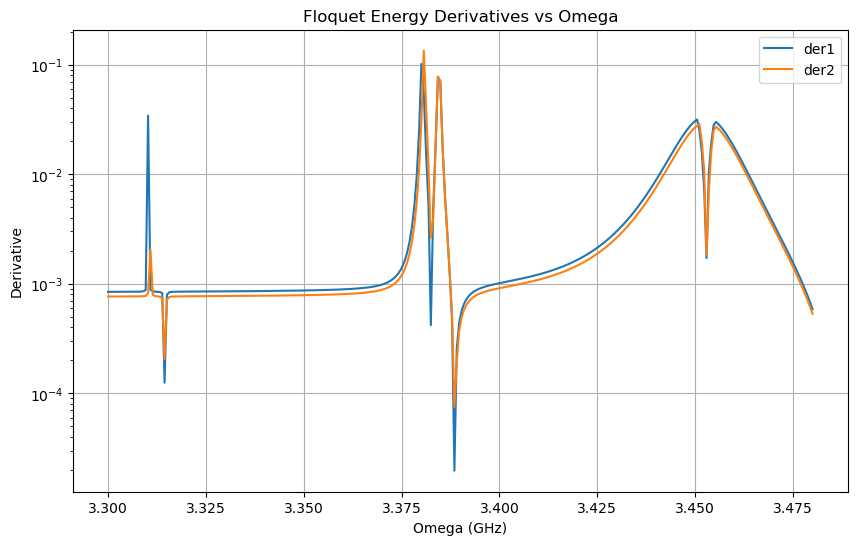

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(omega_vals, np.abs(der1_values), label="der1")
plt.plot(omega_vals, np.abs(der2_values), label="der2")
plt.xlabel("Omega (GHz)")
plt.ylabel("Derivative")
plt.yscale('log')
plt.title("Floquet Energy Derivatives vs Omega")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Parameters
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

import sympy as sp
from sympy import eye
from sympy import symbols, Matrix
def energycor(Av,chi1cv,chi2cv,deltav,alphacv):
    omega1, omega2 , omegac,  = symbols('omega_1 omega_2 omega_c', real=True)
    alpha1, alpha2 , alphac,  = symbols('alpha_1 alpha_2 alpha_c', real=True)
    delta = symbols('delta',real = True)
    chi12, chi2c, chi1c = symbols('chi_12 chi_2c chi_1c', real=True)
    A = symbols('A', real=True)

    import qutip as qt
    E10,E01 = qt.qload('expr')
    values = {
        A: Av,        # example value
        chi1c: chi1cv,    # example value
        chi2c: chi2cv,    # example value
        delta: deltav,    # example value
        alphac: alphacv    # example value
    }

    # Substitute the values into the expression
    e01= E01.subs(values)
    e10 = E10.subs(values)
    return e01,e10

def energy(A,omegad,omega3):
    dim = [5,5,5]
    d1 = d2 = d3 = 5
    omega1 = 5 * 2 * np.pi
    omega2 = 5.09* 2 * np.pi
    delta1 = delta2 = -0.24 * 2 * np.pi
    delta3 = -0.14 * 2 * np.pi
    g13 = g23 = 0.11 * 2 * np.pi
    g12 = -6e-3 * 2 * np.pi

    # Create operators
    a1, a2, a3 = [annihilation(d) for d in (d1, d2, d3)]
    a1d, a2d, a3d = [creation(d) for d in (d1, d2, d3)]
    I1, I2, I3 = [np.eye(d) for d in (d1, d2, d3)]

    # Construct Hamiltonians
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    H3 = omega3 * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3

    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))

    # Interaction terms
    Hint12 = g12 * np.kron(I3, np.kron(a2d + a2, a1d + a1))
    Hint23 = g23 * np.kron(a3d + a3, np.kron(a2d + a2, I1))
    Hint13 = g13 * np.kron(a3d + a3, np.kron(I2, a1d + a1))

    # Total Hamiltonian
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13
    
    Hc = np.kron(a3d + a3, np.kron(I2, I1))

    # Diagonalize
    eigenvalues, _ = eigh(H)
    eigenvalues -= eigenvalues[0]
    eigenvalues,_ = sort_eigenpairs(eigenvalues,_) 
    dim = [5,5,5]
    index001 = state_index([0,0,1],dim)
    index010 = state_index([0,1,0],dim)
    index011 = state_index([0,1,1],dim)
    index100 = state_index([1,0,0],dim)
    index101 = state_index([1,0,1],dim)
    index110 = state_index([1,1,0],dim)

    
    chi12 = eigenvalues[index011]-eigenvalues[index010]-eigenvalues[index001]
    chi23 = eigenvalues[index110]-eigenvalues[index010]-eigenvalues[index100]
    chi13 = eigenvalues[index101]-eigenvalues[index001]-eigenvalues[index100]
    omega1 = eigenvalues[index001]
    omega2 = eigenvalues[index010]
    omega3 = eigenvalues[index100]
    
    H1 = omega1 * a1d @ a1 + delta1/2 * a1d @ a1d @ a1 @ a1
    H2 = omega2 * a2d @ a2 + delta2/2 * a2d @ a2d @ a2 @ a2
    delta = (omega3-omegad)
    H3 = (omega3-omegad) * a3d @ a3 + delta3/2 * a3d @ a3d @ a3 @ a3
    H1 = np.kron(I3, np.kron(I2, H1))
    H2 = np.kron(I3, np.kron(H2, I1))
    H3 = np.kron(H3, np.kron(I2, I1))
    
    Hint12 = chi12 * np.kron(I3, np.kron(a2d @ a2, a1d @ a1))
    Hint23 = chi23 * np.kron(a3d @ a3, np.kron(a2d @ a2, I1))
    Hint13 = chi13 * np.kron(a3d @ a3, np.kron(I2, a1d @ a1))
    H = H1 + H2 + H3 + Hint12 + Hint23 + Hint13 + A/2*Hc
    e01c,e10c = energycor(A,chi13,chi23,delta,delta3)
    E1 = omega1 + e01c
    E2 = omega2 + e10c
    return E1/2/np.pi,E2/2/np.pi,0
 

In [6]:
from joblib import Parallel, delayed
def calculate_derivativesapp(A, omegad, omega3):
    energy001, energy010,zz = energy(A, omegad, omega3)
    epsilon = 1e-6
    omega3p = omega3 + epsilon
    energy001_, energy010_, _ = energy(A, omegad, omega3p)
    der1 = (energy001_ - energy001) / epsilon
    der2 = (energy010_ - energy010) / epsilon
    return der1, der2, omegad / (2 * np.pi)
def sweep_floquet_energies_derivatives(A, omega3, omega_range):
    der1_values = Parallel(n_jobs=-1)(delayed(calculate_derivativesapp)(A, omegad, omega3) for omegad in omega_range)
    der1_values, der2_values, omega_vals = zip(*der1_values)
    return omega_vals, der1_values, der2_values

In [7]:
energy(0.005*2*np.pi, 3.3846*2*np.pi, 3.47286432160804*2*np.pi)

(5.00615665372172, 5.09574181510091, 0)

In [8]:
floquetapp(0.005*2*np.pi, 3.3846*2*np.pi, 3.47286432160804*2*np.pi)

2.1880352092438088e-07 -0.0038249945653886495 -0.00431088904846485


(5.006274575807273, 5.095859735921233, 9.04098788092611e-05)

In [9]:
omegad

array([21.36283004, 21.36451116, 21.36619228, 21.3678734 , 21.36955452,
       21.37123564, 21.37291676, 21.37459788, 21.376279  , 21.37796012,
       21.37964124, 21.38132236, 21.38300348, 21.3846846 , 21.38636572,
       21.38804684, 21.38972796, 21.39140908, 21.3930902 , 21.39477132,
       21.39645244, 21.39813356, 21.39981468, 21.4014958 , 21.40317692,
       21.40485804, 21.40653916, 21.40822028, 21.4099014 , 21.41158252,
       21.41326364, 21.41494476, 21.41662588, 21.418307  , 21.41998812,
       21.42166924, 21.42335036, 21.42503148, 21.4267126 , 21.42839372,
       21.43007484, 21.43175596, 21.43343708, 21.4351182 , 21.43679932,
       21.43848044, 21.44016156, 21.44184268, 21.4435238 , 21.44520492,
       21.44688604, 21.44856715, 21.45024827, 21.45192939, 21.45361051,
       21.45529163, 21.45697275, 21.45865387, 21.46033499, 21.46201611,
       21.46369723, 21.46537835, 21.46705947, 21.46874059, 21.47042171,
       21.47210283, 21.47378395, 21.47546507, 21.47714619, 21.47

In [10]:
omega3 = 3.47286432160804*2*np.pi
A = 0.03*2*np.pi
# omegad = np.linspace(3.3846*2*np.pi,3.3848*2*np.pi,50)
omegad = np.linspace(3.37*2*np.pi,3.5*2*np.pi,1000)
omega_vals, der1_values, der2_values = sweep_floquet_energies_derivatives(A, omega3, omegad)

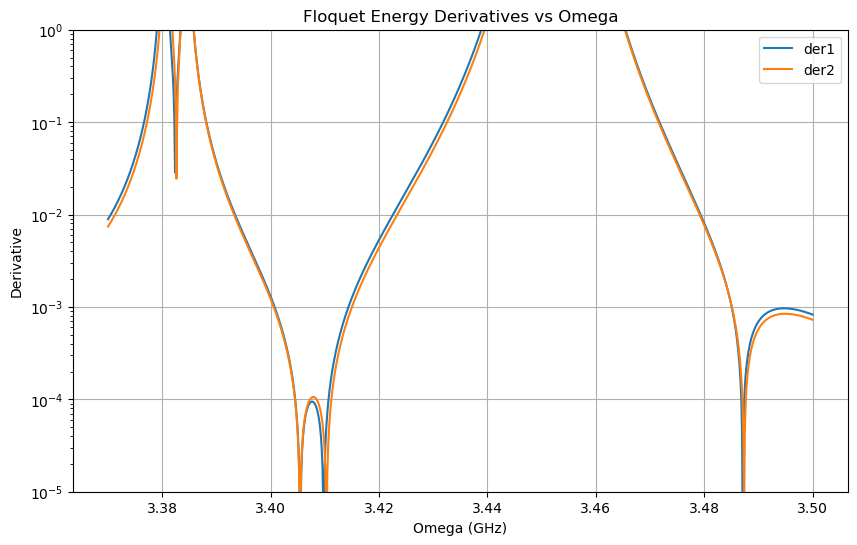

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(omega_vals, np.abs(der1_values), label="der1")
plt.plot(omega_vals, np.abs(der2_values), label="der2")
plt.xlabel("Omega (GHz)")
plt.ylabel("Derivative")
plt.yscale('log')
plt.title("Floquet Energy Derivatives vs Omega")
plt.ylim(1e-5,1)
plt.legend()
plt.grid(True)
plt.show()

In [12]:

import sympy as sp
from sympy import eye
from sympy import symbols, Matrix
def energycor(Av,chi1cv,chi2cv,deltav,alphacv):
    omega1, omega2 , omegac,  = symbols('omega_1 omega_2 omega_c', real=True)
    alpha1, alpha2 , alphac,  = symbols('alpha_1 alpha_2 alpha_c', real=True)
    delta = symbols('delta',real = True)
    chi12, chi2c, chi1c = symbols('chi_12 chi_2c chi_1c', real=True)
    A = symbols('A', real=True)

    import qutip as qt
    E10,E01 = qt.qload('expr')
    values = {
        A: Av,        # example value
        chi1c: chi1cv,    # example value
        chi2c: chi2cv,    # example value
        delta: deltav,    # example value
        alphac: alphacv    # example value
    }

    # Substitute the values into the expression
    e01= E01.subs(values)
    e10 = E10.subs(values)
    return e01,e10

In [13]:
E10

NameError: name 'E10' is not defined

In [14]:
values = {
        A: 0,        # example value
        chi1c: 0,    # example value
        chi2c: 0,    # example value
        delta: 9,    # example value
        alphac: 0    # example value
    }

# Substitute the values into the expression
result = E01.subs(values)

NameError: name 'chi1c' is not defined

In [108]:
result

0